       AC-FULL PROFESSORS  AC-ASSOCIATE PROFESSORS  AC-ASSISTANT PROFESSORS
STATE                                                                      
CA                 759.70                   593.76                   496.46
IA                 530.59                   452.15                   399.78
IL                 569.08                   492.30                   407.96
IN                 566.27                   477.07                   414.88
MA                 768.33                   602.86                   507.60
MI                 615.19                   497.53                   447.09
MO                 514.88                   443.97                   392.47
NC                 529.12                   460.36                   395.07
NY                 710.07                   575.44                   476.79
OH                 571.60                   502.68                   416.96
PA                 693.28                   571.08                   476.09
TN          

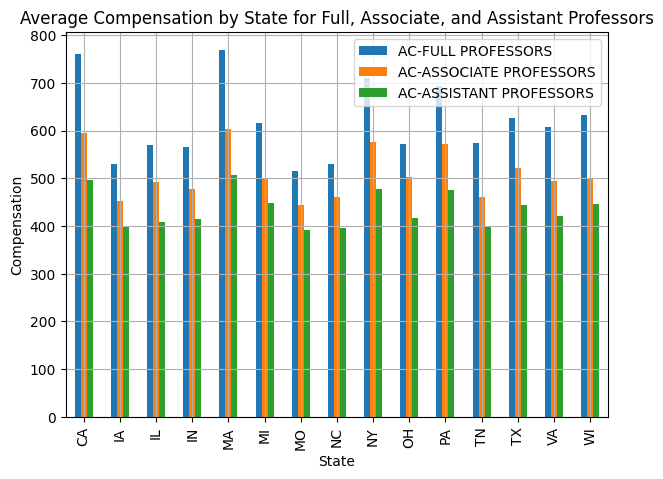

<Axes: ylabel='Density'>

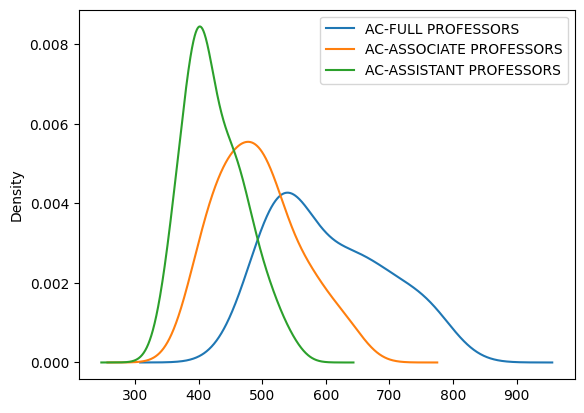

In [24]:
#  What is the observed trend in the average compensations of full, associate and assistant professors across multiple colleges situated in different states?
import pandas as pd
import matplotlib.pyplot as plt
df1=pd.read_csv("/content/aaup (1).csv")
df1=df1.replace("*",0)
df1['AC-FULL PROFESSORS'] = df1['AC-FULL PROFESSORS'].astype(float)
df1['AC-ASSOCIATE PROFESSORS'] = df1['AC-ASSOCIATE PROFESSORS'].astype(float)
df1['AC-ASSISTANT PROFESSORS'] = df1['AC-ASSISTANT PROFESSORS'].astype(float)

df2 = df1.groupby('STATE')[['AC-FULL PROFESSORS', 'AC-ASSOCIATE PROFESSORS', 'AC-ASSISTANT PROFESSORS']].mean().round(2)
df3 = df1['STATE'].value_counts().head(15).index.tolist()

df4 = df2[df2.index.isin(df3)]
print(df4)

df4.plot(kind='bar', figsize=(7, 5))

plt.title('Average Compensation by State for Full, Associate, and Assistant Professors')
plt.xlabel('State')
plt.ylabel('Compensation')
plt.grid()
df2.plot.kde()



Text(0, 0.5, 'Percent of Alumni Who Donate')

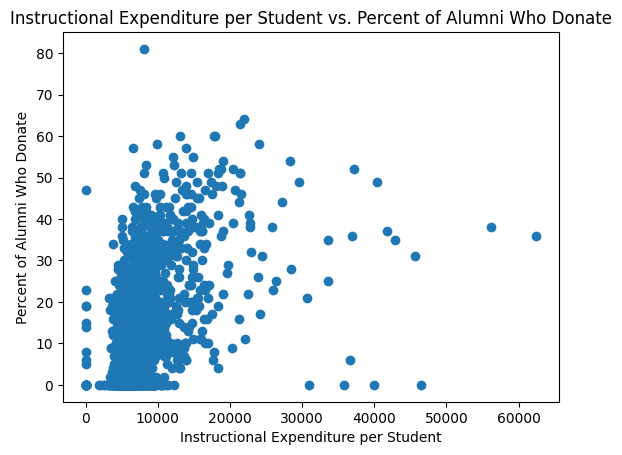

In [2]:
# Assuming that Instructional expenditure is the amount spent by each student in the college, is it possible to assert that the greater the percentage of alumni who donate, lesser is the instructional expenditure per student?

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/usnews (2).csv')
df=df.replace("*",0)
df['%ALUMNI WHO DONATE']=df['%ALUMNI WHO DONATE'].astype(float)
df["INSTRUCTIONAL EXPENDITURE PER STUDENT"]=df['INSTRUCTIONAL EXPENDITURE PER STUDENT'].astype(float)
alumni_donate = df['%ALUMNI WHO DONATE']
instructional_expense = df['INSTRUCTIONAL EXPENDITURE PER STUDENT']

plt.scatter(instructional_expense, alumni_donate)
plt.title('Instructional Expenditure per Student vs. Percent of Alumni Who Donate')
plt.xlabel('Instructional Expenditure per Student')
plt.ylabel('Percent of Alumni Who Donate')


                        COLLEGE NAME  APPLICATIONS ACCEPTED  \
0          Alaska Pacific University                  146.0   
1  University of Alaska at Fairbanks                 1427.0   
2     University of Alaska Southeast                  117.0   
3  University of Alaska at Anchorage                 1598.0   
4        Alabama Agri. & Mech. Univ.                 1920.0   
5                Faulkner University                  320.0   
6           University of Montevallo                  892.0   
7           Alabama State University                 3272.0   
8      Auburn University-Main Campus                 6791.0   
9        Birmingham-Southern College                  588.0   

   NEW STUDENTS ENROLLED  difference  
0                   55.0        91.0  
1                  928.0       499.0  
2                   89.0        28.0  
3                 1162.0       436.0  
4                  984.0       936.0  
5                  179.0       141.0  
6                  570.0       32

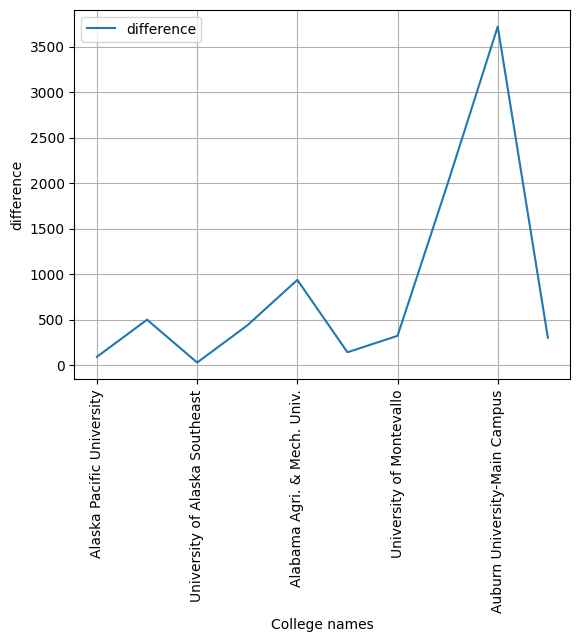

In [3]:
#Could it be a valid assumption that some students who have been granted admission to a college or university do not ultimately enroll due to financial constraints related to the institution’s tuition fees?
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/usnews (2).csv')
df=df.replace("*",0)
df["OUT-OF-STATE TUITION"]=df["OUT-OF-STATE TUITION"].astype(float)
df["APPLICATIONS ACCEPTED"]=df["APPLICATIONS ACCEPTED"].astype(float)
df["NEW STUDENTS ENROLLED"]=df["NEW STUDENTS ENROLLED"].astype(float)

df.sort_values("OUT-OF-STATE TUITION",ascending=False)
df_top10=df.head(10)[["COLLEGE NAME","APPLICATIONS ACCEPTED","NEW STUDENTS ENROLLED"]]
df_top10["difference"]=df_top10["APPLICATIONS ACCEPTED"]-df_top10["NEW STUDENTS ENROLLED"]
print(df_top10)

df_top10.plot(kind="line",x="COLLEGE NAME",y="difference")
plt.xticks(rotation=90)
plt.xlabel("College names")
plt.ylabel("difference")



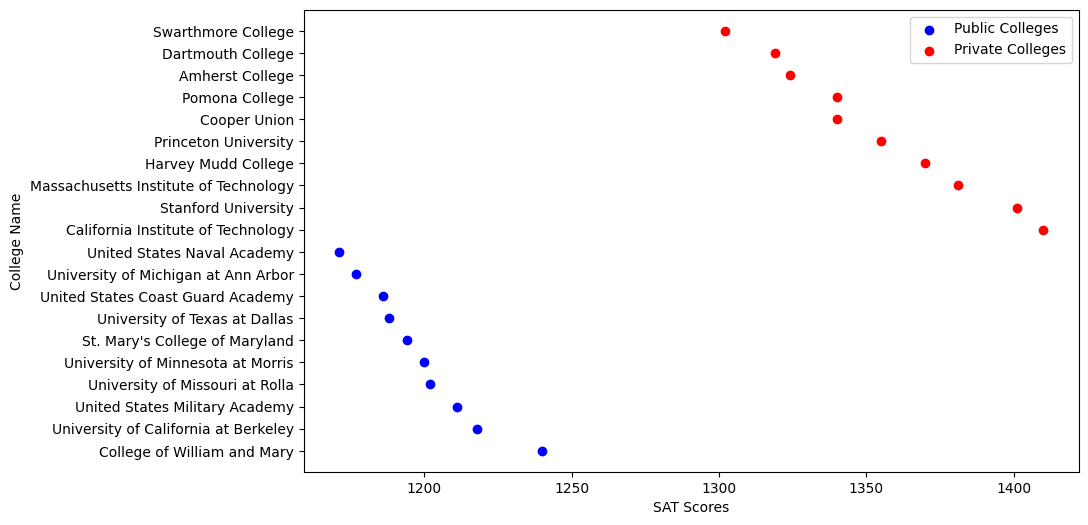

In [22]:
# In terms of SAT scores, how do the admission requirements of top public and private colleges compare with each other?
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/usnews (2).csv')

df=df.replace("*",0)
df["AVERAGE COMBINED SAT SCORE"]=df["AVERAGE COMBINED SAT SCORE"].astype(float)
public_colleges = ((df[df['PUBLIC/PRIVATE INDICATOR'] == 1]).sort_values("AVERAGE COMBINED SAT SCORE",ascending=False)).head(10)
private_colleges = ((df[df['PUBLIC/PRIVATE INDICATOR'] == 2]).sort_values("AVERAGE COMBINED SAT SCORE",ascending=False)).head(10)

plt.figure(figsize=(10, 6))

plt.scatter(public_colleges['AVERAGE COMBINED SAT SCORE'], public_colleges['COLLEGE NAME'], color='blue', label='Public Colleges')
plt.scatter(private_colleges['AVERAGE COMBINED SAT SCORE'], private_colleges['COLLEGE NAME'], color='red', label='Private Colleges')

plt.legend()
plt.xlabel('SAT Scores')
plt.ylabel('College Name')

plt.show()


Text(0, 0.5, 'Graduation rate')

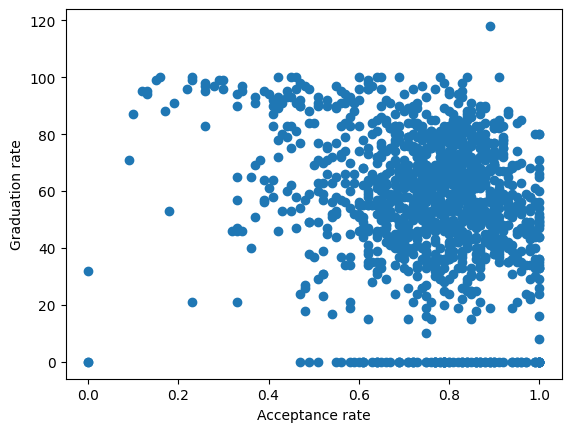

In [35]:
# Can we make a hypothesis that there is a correlation between the college’s acceptance rate and its graduation rate ,such that the lower the acceptance rate the higher the graduation rate?
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/usnews (2).csv")
df=df.replace("*",0)
df["APPLICATIONS RECEIVED"]=df["APPLICATIONS RECEIVED"].astype(float)
df["APPLICATIONS ACCEPTED"]=df["APPLICATIONS ACCEPTED"].astype(float)
df["GRADUATION RATE"]=df["GRADUATION RATE"].astype(float)
df["Acceptance rate"]=(df["APPLICATIONS ACCEPTED"]/df["APPLICATIONS RECEIVED"]).round(2)
plt.scatter(x=df["Acceptance rate"],y=df["GRADUATION RATE"])
plt.xlabel("Acceptance rate")
plt.ylabel("Graduation rate")



PUBLIC/PRIVATE INDICATOR   1   2
STATE                           
CA                        28  42
IL                        10  39
IN                        13  29
MA                        11  45
NC                        14  32
NY                        28  73
OH                        13  39
PA                        18  65
TX                        27  33
VA                        15  25


Text(0.5, 1.0, 'Comparison between number of public and private colleges in different states')

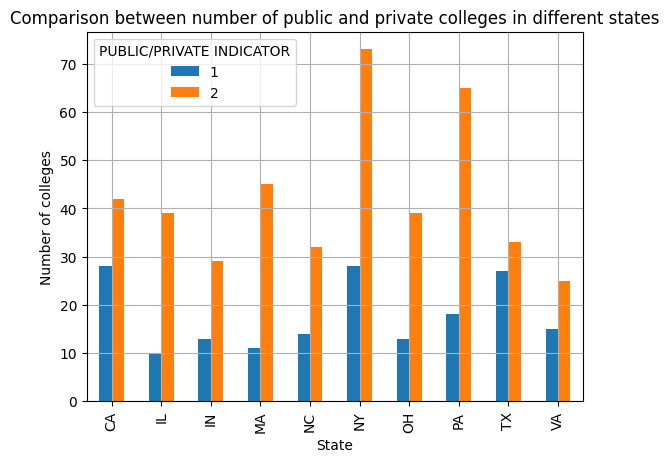

In [4]:
#What conclusion can we draw from examining the distribution of public and private colleges across different states in the United States?

import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/usnews (2).csv")
df=df.replace("*",0)
top_states=df["STATE"].value_counts().head(10).index.tolist()
top_states_df=df[df["STATE"].isin(top_states)]
counts=top_states_df.groupby(["STATE","PUBLIC/PRIVATE INDICATOR"]).count()["FICE"]
df1=counts.reset_index()
pivoted = df1.pivot(index='STATE', columns='PUBLIC/PRIVATE INDICATOR', values='FICE')
print(pivoted)
pivoted.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Number of colleges")
plt.title("Comparison between number of public and private colleges in different states")







Text(0, 0.5, 'Average Compensation- All ranks')

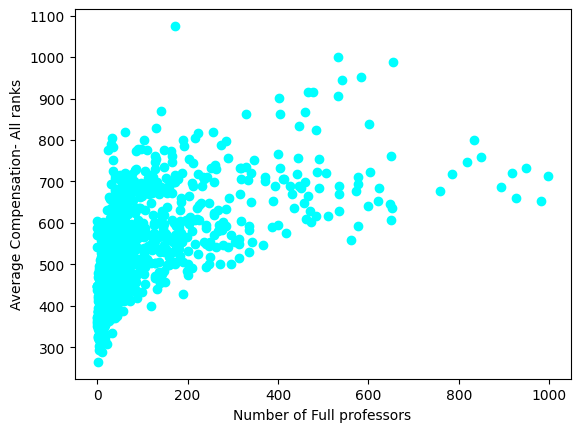

In [6]:
# Is it possible to assert that the number of full professors would be a crucial determinant in the average compensation- all ranks across various colleges?  

import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/aaup (1).csv")
df.replace("*",0)
df["FULL PROFESSORS"]=df["FULL PROFESSORS"].astype(float)
df["AC-ALL RANKS"]=df["AC-ALL RANKS"].astype(float)
plt.scatter(df["FULL PROFESSORS"],df["AC-ALL RANKS"],color="cyan")
plt.xlabel("Number of Full professors")
plt.ylabel("Average Compensation- All ranks")


      FULL PROFESSORS  ASSOCIATE PROFESSORS  ASSISTANT PROFESSORS
TYPE                                                             
I          334.305556            227.144444            188.811111
IIA         94.537190             77.432507             78.553719
IIB         25.750405             24.333874             27.797407
VIIB        27.000000             31.000000             33.000000


Text(0.5, 1.0, 'Comparing the number of professors in different types of colleges')

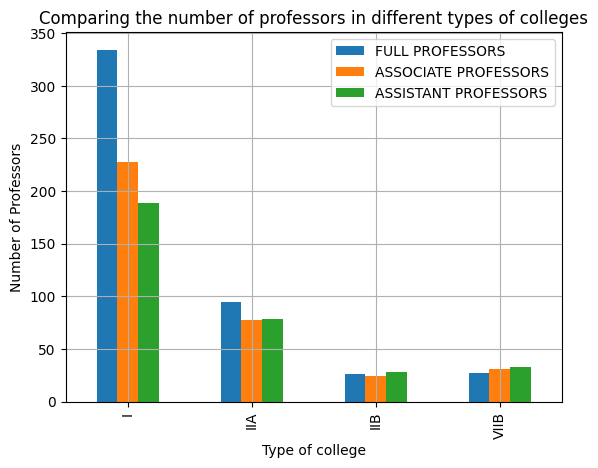

In [5]:
#Is there a correlation in the comparative count of Full, assistant and associate professors in diverse types of colleges?
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/aaup (1).csv")
df.replace("*",0)
df["FULL PROFESSORS"]=df["FULL PROFESSORS"].astype(float)
df["ASSOCIATE PROFESSORS"]=df["ASSOCIATE PROFESSORS"].astype(float)
df["ASSISTANT PROFESSORS"]=df["ASSISTANT PROFESSORS"].astype(float)
df1=df.groupby("TYPE").mean()[["FULL PROFESSORS","ASSOCIATE PROFESSORS","ASSISTANT PROFESSORS"]]

df1.plot(kind="bar")
print(df1)
plt.xlabel("Type of college")
plt.ylabel("Number of Professors")
plt.title("Comparing the number of professors in different types of colleges")



TYPE
IIB     617
IIA     363
I       180
VIIB      1
dtype: int64


Text(0.5, 1.0, 'Comparing the number of different types of college in US')

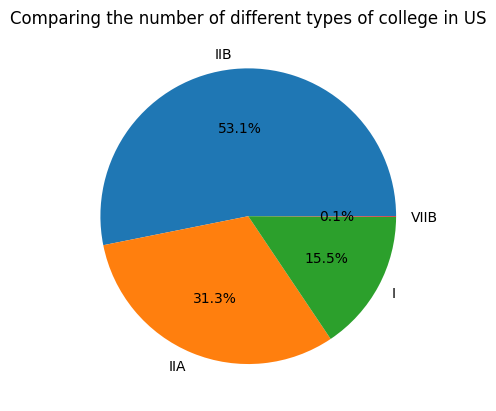

In [19]:
# What is the comprehensive analysis of the nationwide distribution of diverse college types, such as I,IIA, IIB, etc. across the United States?

import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/aaup (1).csv")
df1=df.value_counts("TYPE")
print(df1)
df1.plot(kind="pie",autopct="%1.1f%%")
plt.ylabel("")
plt.title("Comparing the number of different types of college in US")

<Axes: ylabel='Density'>

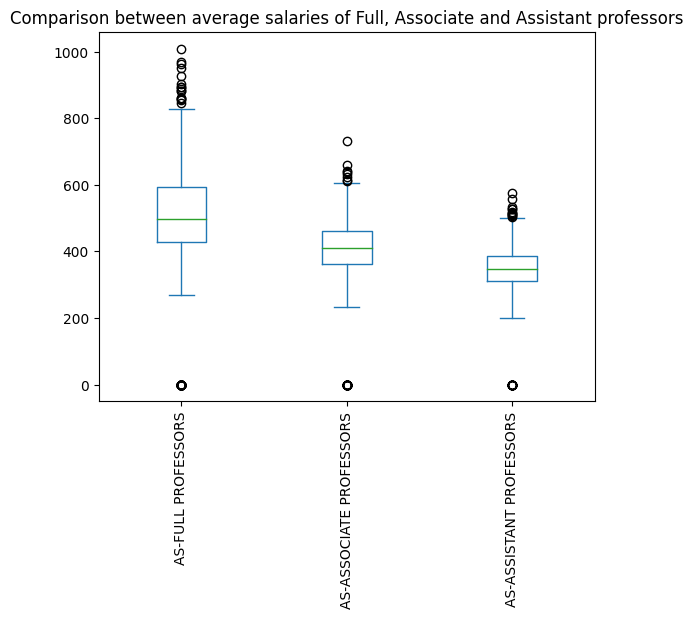

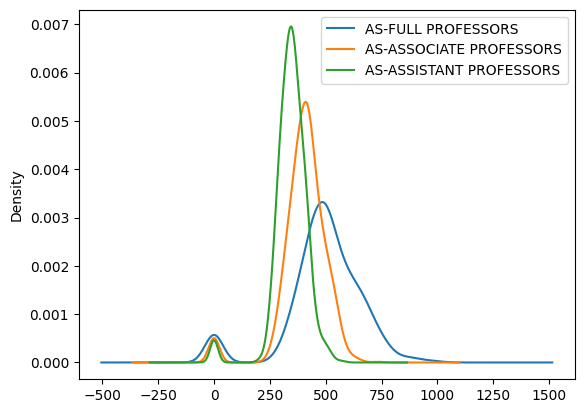

In [31]:
# What are the differences and similarities in the median salaries of  full, associate and assistant professors across the United States?

import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/aaup (1).csv")
df=df.replace("*",0)
df["AS-FULL PROFESSORS"]=df["AS-FULL PROFESSORS"].astype(float)
df["AS-ASSOCIATE PROFESSORS"]=df["AS-ASSOCIATE PROFESSORS"].astype(float)
df["AS-ASSISTANT PROFESSORS"]=df["AS-ASSISTANT PROFESSORS"].astype(float)
df1=df[["AS-FULL PROFESSORS","AS-ASSOCIATE PROFESSORS","AS-ASSISTANT PROFESSORS"]]
df1.plot(kind="box")
plt.xticks(rotation=90)
plt.title("Comparison between average salaries of Full, Associate and Assistant professors")
df1.plot.kde()